In [2]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage import io
from numpy.typing import NDArray

In [3]:
file = "pandas.npy"
image = np.load(file)
print(image.shape)

(400, 600, 3)


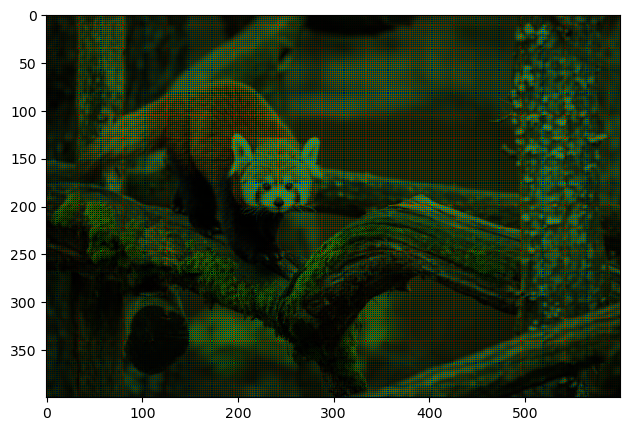

In [4]:
io.imshow(image);

In [11]:
demosaicking_convolution_mask = np.array(
    [
        [[1.0, 0.5, 1.0],
         [1.0, 0.5, 1.0]],
        [[1.0, 0.5, 1.0],
         [1.0, 0.5, 1.0]]
    ]
)

print(demosaicking_convolution_mask.shape)

(2, 2, 3)


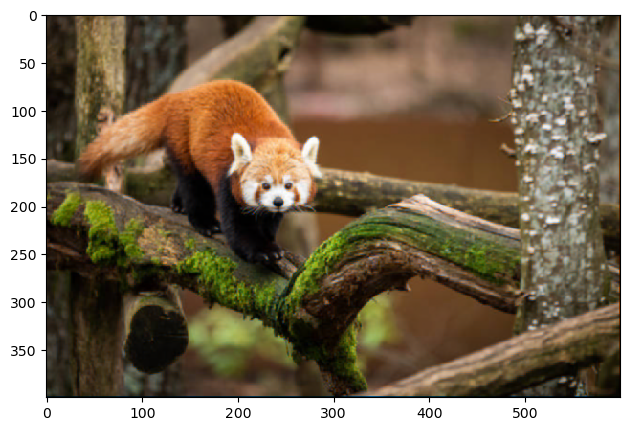

In [12]:
reconstructed_image = np.dstack([
    ndimage.convolve(image[:, :, channel], demosaicking_convolution_mask[:, :, channel], mode="constant", cval=0.0)
    for channel in range(3)
])

_ = io.imshow(reconstructed_image)

In [13]:
def linear_kernel(x, offset: float, width: float):
    return (1 - np.abs((x - offset) / width)) * (np.abs((x - offset) / width) < 1)

def interpolate_row(row):
    space = np.linspace(0, 1, 2 * len(row))
    kernels = [linear_kernel(space, offset=2 * x, width=1 / len(row)) * y for x, y in zip(space, row)]
    return space, np.sum(np.asarray(kernels), axis=0)

In [14]:
green = image[:, :, 1]
red = image[:, :, 0]
blue = image[:, :, 2]

to_interp = green[::2, ::2]

# Interpolate green channel
interpolated_rows = [interpolate_row(row)[1] for row in to_interp]
iterpolated = np.asarray(interpolated_rows)D

# Interpolate columns
interpolated_columns = [interpolate_row(column)[1] for column in iterpolated.T]
iterpolated2 = np.asarray(interpolated_columns).T

# Create interpolated green channel
result_green = iterpolated2

# Interpolate red channel rows and columns
red_row_inter = np.asarray([interpolate_row(row[1::2])[1] for row in red[::2]])
red_col_inter = np.asarray([interpolate_row(col)[1] for col in red_row_inter.T])
result_red = red_col_inter

# Interpolate blue channel rows and columns
blue_row_inter = np.asarray([interpolate_row(row[::2])[1] for row in blue[1::2]])
blue_col_inter = np.asarray([interpolate_row(col)[1] for col in blue_row_inter.T])
result_blue = blue_col_inter

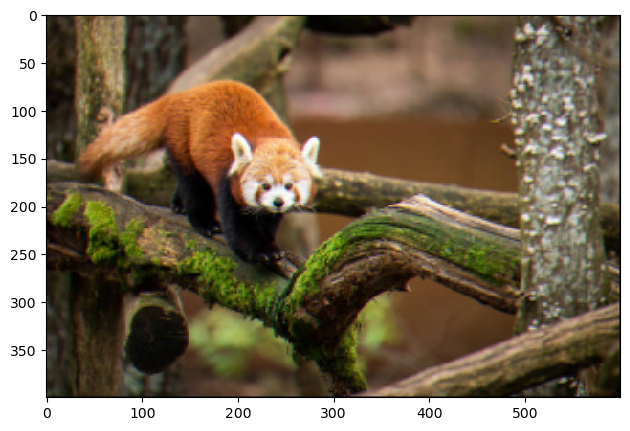

In [15]:
result_image = np.dstack([result_red.T, result_green, result_blue.T])

io.imshow(result_image);